In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns




model1_type = 'deepfm' # 模型类型
model1_num = 2 # 序列号

model2_type = 'deepfm' # 模型类型
model2_num = 4 # 序列号

model3_type = 'deepfm' # 模型类型
model3_num = 5 # 序列号

model4_type = 'deepfm' # 模型类型
model4_num = 6 # 序列号

model5_type = 'fm' # 模型类型
model5_num = 2 # 序列号

model6_type = 'fm' # 模型类型
model6_num = 3 # 序列号

model7_type = 'dnn' # 模型类型
model7_num = 1 # 序列号

model10_type = 'gbdt' # 模型类型
model10_num = 3 # 序列号

model11_type = 'gbdt' # 模型类型
model11_num = 4 # 序列号

model12_type = 'gbdt' # 模型类型
model12_num = 5 # 序列号

In [2]:
def read_predict(model, num):
    path = 'result/stack_fusion/{}/stack{}/'.format(model, num)
    pre1 = pd.read_csv(path+'tr1_predict.csv')
    pre2 = pd.read_csv(path+'tr2_predict.csv')
    pre3 = pd.read_csv(path+'tr3_predict.csv')
    pre4 = pd.read_csv(path+'tr4_predict.csv')
    return pd.concat([pre1, pre2, pre3, pre4], 0)

In [4]:
# 读取model1的预测
model1_pre = read_predict(model1_type, model1_num)

# 读取model2的预测
model2_pre = read_predict(model2_type, model2_num)

# 读取model3的预测
model3_pre = read_predict(model3_type, model3_num)

# 读取model4的预测
model4_pre = read_predict(model4_type, model4_num)

# 读取model5的预测
model5_pre = read_predict(model5_type, model5_num)

# 读取model6的预测
model6_pre = read_predict(model6_type, model6_num)

# 读取model7的预测
model7_pre = read_predict(model7_type, model7_num)

# 读取model8的预测
# model8_pre = read_predict(model8_type, model8_num)

# 读取model9的预测
# model9_pre = read_predict(model9_type, model9_num)

# 读取model10的预测
model10_pre = read_predict(model10_type, model10_num)

# 读取model11的预测
model11_pre = read_predict(model11_type, model11_num)

# 读取model11的预测
model12_pre = read_predict(model12_type, model12_num)

# 读取label
y1 = pd.read_csv('data/tr1/tr1_y.csv')
y2 = pd.read_csv('data/tr2/tr2_y.csv')
y3 = pd.read_csv('data/tr3/tr3_y.csv')
y4 = pd.read_csv('data/tr4/tr4_y.csv')

y = pd.concat([y1, y2, y3, y4])
print('x1 shape:', model1_pre.shape)
print('x2 shape:',model2_pre.shape)
print('x3 shape:',model3_pre.shape)
print('x4 shape:',model4_pre.shape)
print('x5 shape:',model5_pre.shape)
print('x6 shape:',model6_pre.shape)
print('x7 shape:',model7_pre.shape)
# print('x8 shape:',model8_pre.shape)
# print('x9 shape:',model9_pre.shape)
print('x10 shape:',model10_pre.shape)
print('x11 shape:',model11_pre.shape)
print('x12 shape:',model12_pre.shape)
print('y shape:',y.shape)

x1 shape: (45539700, 1)
x2 shape: (45539700, 1)
x3 shape: (45539700, 1)
x4 shape: (45539700, 1)
x5 shape: (45539700, 1)
x6 shape: (45539700, 1)
x7 shape: (45539700, 1)
x10 shape: (45539700, 1)
x11 shape: (45539700, 1)
x12 shape: (45539700, 1)
y shape: (45539700, 1)


In [5]:
model1_pre.rename(columns={'prob':model1_type+str(model1_num)}, inplace = True)
model2_pre.rename(columns={'prob':model2_type+str(model2_num)}, inplace = True)
model3_pre.rename(columns={'prob':model3_type+str(model3_num)}, inplace = True)
model4_pre.rename(columns={'prob':model4_type+str(model4_num)}, inplace = True)
model5_pre.rename(columns={'prob':model5_type+str(model5_num)}, inplace = True)
model6_pre.rename(columns={'prob':model6_type+str(model6_num)}, inplace = True)
model7_pre.rename(columns={'prob':model7_type+str(model7_num)}, inplace = True)
# model8_pre.rename(columns={'prob':model8_type+str(model8_num)}, inplace = True)
# model9_pre.rename(columns={'prob':model9_type+str(model9_num)}, inplace = True)
model10_pre.rename(columns={'prob':model10_type+str(model10_num)}, inplace = True)
model11_pre.rename(columns={'prob':model11_type+str(model11_num)}, inplace = True)
model12_pre.rename(columns={'prob':model12_type+str(model12_num)}, inplace = True)

In [6]:
data = pd.concat([model1_pre,model2_pre,model3_pre,model4_pre,model5_pre,model6_pre,model7_pre,model10_pre,model11_pre,model12_pre,y], 1)
data.head()

,deepfm2,deepfm4,deepfm5,deepfm6,fm2,fm3,dnn1,gbdt3,gbdt4,gbdt5,label
0,0.022054,0.032078,0.034900,0.030370,0.056086,0.024781,0.038512,0.030513,0.047149,0.009362,0
1,0.055663,0.045425,0.062603,0.045907,0.038915,0.042367,0.044249,0.044112,0.049806,0.010745,0
2,0.044260,0.028144,0.030450,0.022868,0.034487,0.028151,0.043944,0.029234,0.031023,0.010777,0
3,0.030778,0.034621,0.032058,0.032654,0.044952,0.030392,0.045531,0.052309,0.045435,0.010553,0
4,0.033031,0.044897,0.035002,0.037484,0.060731,0.044433,0.029991,0.039076,0.038891,0.009362,0


In [7]:
corr = data.corr()
corr

,deepfm2,deepfm4,deepfm5,deepfm6,fm2,fm3,dnn1,gbdt3,gbdt4,gbdt5,label
deepfm2,1.000000,0.943633,0.943080,0.941917,0.922859,0.935312,0.945733,0.874285,0.877550,-0.002173,0.274454
deepfm4,0.943633,1.000000,0.972365,0.942313,0.944218,0.953095,0.943167,0.900162,0.905410,-0.003804,0.274399
deepfm5,0.943080,0.972365,1.000000,0.945940,0.945609,0.952393,0.944164,0.899011,0.904807,-0.004939,0.274569
deepfm6,0.941917,0.942313,0.945940,1.000000,0.919988,0.935728,0.940498,0.876026,0.879661,-0.009951,0.273757
fm2,0.922859,0.944218,0.945609,0.919988,1.000000,0.927929,0.923485,0.879052,0.884652,0.000225,0.269333
fm3,0.935312,0.953095,0.952393,0.935728,0.927929,1.000000,0.922492,0.889202,0.895546,-0.005233,0.269031
dnn1,0.945733,0.943167,0.944164,0.940498,0.923485,0.922492,1.000000,0.868792,0.872850,-0.009802,0.273659
gbdt3,0.874285,0.900162,0.899011,0.876026,0.879052,0.889202,0.868792,1.000000,0.972220,0.000043,0.280437
gbdt4,0.877550,0.905410,0.904807,0.879661,0.884652,0.895546,0.872850,0.972220,1.000000,0.000571,0.276191
gbdt5,-0.002173,-0.003804,-0.004939,-0.009951,0.000225,-0.005233,-0.009802,0.000043,0.000571,1.000000,-0.000137


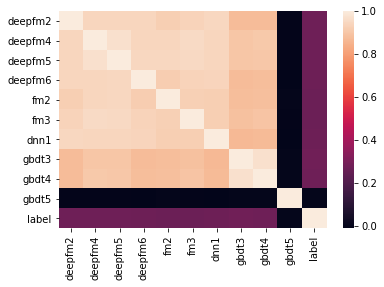

In [8]:
sns.heatmap(corr)
plt.show()

由相关度图可知，融合潜力由大到小依次为：


dnn1+gbdt2   0.871082
deepfm2+gbdt2 0.876449
fm1+gbdt2    0.896437
fm1+dnn1     0.931673
fm1+deepfm2   0.931174	
dnn1+deepfm2  0.945733